In [839]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set()

## Run All Shortcut

In [840]:
%%javascript

Jupyter.keyboard_manager.command_shortcuts.add_shortcut('r', {
    help : 'run all cells',
    help_index : 'zz',
    handler : function (event) {
        IPython.notebook.execute_all_cells();
        return false;
    }}
);


<IPython.core.display.Javascript object>

## List of Tickers (Local)

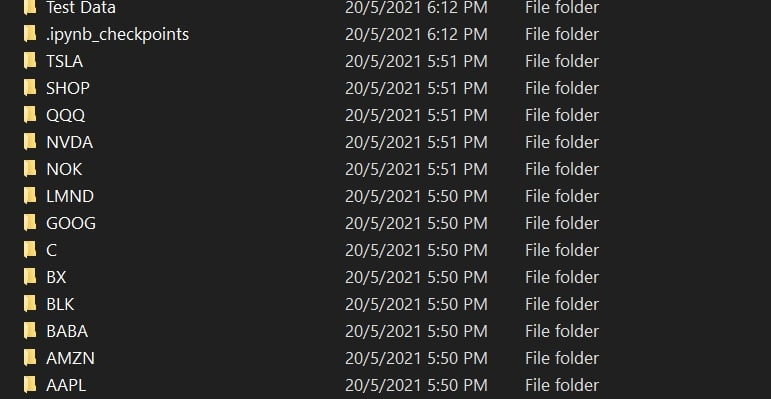

In [841]:
# dir = r"C:\Users\banila\RRL-Stock-Trading\Stock Tickers\Final Data\Daily" # VM path
dir = r"C:\Users\night\RRL-Stock-Trading\Stock Tickers\Final Data\Daily" # Local path

name2 = 'TSLA' # ticker name
path = f'{dir}\{name2}_Daily*.csv' # 15min, 30min, 1hr

import glob
files = glob.glob(path)
for f in files:
  print(f)

C:\Users\night\RRL-Stock-Trading\Stock Tickers\Final Data\Daily\TSLA_Daily.csv


In [842]:
### Dataframe df
import pandas as pd
df = pd.DataFrame()
for f in files:
    df_full = pd.read_csv(f)

print(f"No. of data points in {name2} test dataset: {len(df_full)}")

No. of data points in TSLA test dataset: 1106


## Test Conditions

1. 02 Jan 2020 to 31 Dec 2020
2. GOOG, AAPL, BABA, BX, C
3. 10,000 USD
4. No fractional shares

In [843]:
## Select Start and End Time
df_full.set_index('time', inplace = True)
start = '2019-01' ## YYYY-MM
end = '2021-01' ## YYYY-MM


df_full = df_full.loc[start:end].copy()
print(f"No. of data points in {name2} test dataset: {len(df_full)}")

No. of data points in TSLA test dataset: 505


In [844]:
# Check Start Date
df_full.head()

,symbol,close,high,low,open,volume
time,,,,,,
2019-01-01,TSLA UNU3P8Y3WFAD,66.560,67.842,65.052,67.482,30744985.0
2019-01-03,TSLA UNU3P8Y3WFAD,62.024,63.026,59.760,61.220,54929310.0
2019-01-04,TSLA UNU3P8Y3WFAD,60.072,61.880,59.476,61.402,34016180.0
2019-01-05,TSLA UNU3P8Y3WFAD,63.538,63.600,60.544,61.200,36193315.0
2019-01-08,TSLA UNU3P8Y3WFAD,66.992,67.356,63.560,64.320,36889815.0


In [845]:
# Check End Date
df_full.tail()

,symbol,close,high,low,open,volume
time,,,,,,
2020-12-24,TSLA UNU3P8Y3WFAD,645.98,651.49,622.66,632.42,31317056.0
2020-12-25,TSLA UNU3P8Y3WFAD,661.77,666.09,641.00,643.01,22143868.0
2020-12-29,TSLA UNU3P8Y3WFAD,663.69,681.40,660.80,674.68,30169446.0
2020-12-30,TSLA UNU3P8Y3WFAD,665.99,669.90,655.00,660.86,21350179.0
2020-12-31,TSLA UNU3P8Y3WFAD,694.78,696.60,668.40,672.08,41155509.0


In [846]:
df_full.drop(['symbol'], axis=1, inplace=True)


In [847]:
df_full.reset_index(inplace=True)

In [848]:
df_full.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]

start_date = df_full.at[0, 'Date']
# len(df_full)

end_date = df_full.at[len(df_full)-1, 'Date']
print (start_date, end_date)

2019-01-01 2020-12-31


In [849]:
# Check
df_full.head()

,Date,Close,High,Low,Open,Volume
0,2019-01-01,66.560,67.842,65.052,67.482,30744985.0
1,2019-01-03,62.024,63.026,59.760,61.220,54929310.0
2,2019-01-04,60.072,61.880,59.476,61.402,34016180.0
3,2019-01-05,63.538,63.600,60.544,61.200,36193315.0
4,2019-01-08,66.992,67.356,63.560,64.320,36889815.0


In [850]:
# Check

df_full.tail()

,Date,Close,High,Low,Open,Volume
500,2020-12-24,645.98,651.49,622.66,632.42,31317056.0
501,2020-12-25,661.77,666.09,641.00,643.01,22143868.0
502,2020-12-29,663.69,681.40,660.80,674.68,30169446.0
503,2020-12-30,665.99,669.90,655.00,660.86,21350179.0
504,2020-12-31,694.78,696.60,668.40,672.08,41155509.0


In [851]:
# Check for NaN

print(df_full.isnull().values.any())


False


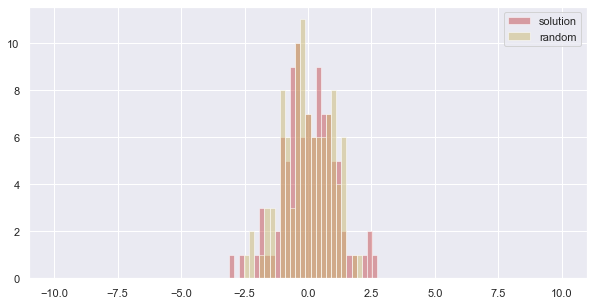

In [852]:
plt.figure(figsize = (10, 5))
bins = np.linspace(-10, 10, 100)

solution = np.random.randn(100)
w = np.random.randn(100)

plt.hist(solution, bins, alpha = 0.5, label = 'solution', color = 'r')
plt.hist(w, bins, alpha = 0.5, label = 'random', color = 'y')
plt.legend()
plt.show()

In [853]:
def f(w):
    return -np.sum(np.square(solution - w))

npop = 50
sigma = 0.1
alpha = 0.001

for i in range(5000):

    if (i + 1) % 1000 == 0:
        print(
            'iter %d. w: %s, solution: %s, reward: %f'
            % (i + 1, str(w[-1]), str(solution[-1]), f(w))
        )
    N = np.random.randn(npop, 100)
    R = np.zeros(npop)
    for j in range(npop):
        w_try = w + sigma * N[j]
        R[j] = f(w_try)

    A = (R - np.mean(R)) / np.std(R)
    w = w + alpha / (npop * sigma) * np.dot(N.T, A)

iter 1000. w: -0.2027468670326379, solution: -0.46275591408343497, reward: -18.989687
iter 2000. w: -0.45419053573350093, solution: -0.46275591408343497, reward: -0.006417
iter 3000. w: -0.47073612813575794, solution: -0.46275591408343497, reward: -0.008340
iter 4000. w: -0.46138500977031016, solution: -0.46275591408343497, reward: -0.007829
iter 5000. w: -0.4752055420481832, solution: -0.46275591408343497, reward: -0.008645


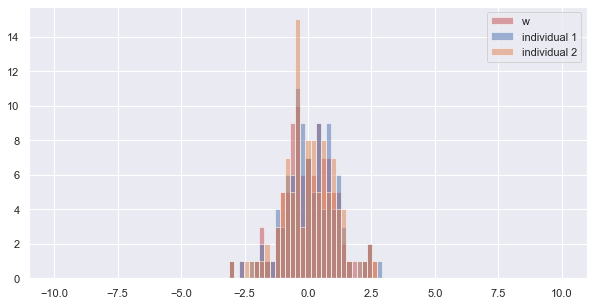

In [854]:
'''
I want to compare my first two individuals with my real w
'''
plt.figure(figsize=(10,5))

sigma = 0.1
N = np.random.randn(npop, 100)
individuals = []
for j in range(2):
    individuals.append(w + sigma * N[j])
    
    
plt.hist(w, bins, alpha=0.5, label='w',color='r')
plt.hist(individuals[0], bins, alpha=0.5, label='individual 1')
plt.hist(individuals[1], bins, alpha=0.5, label='individual 2')
plt.legend()
plt.show()

In [855]:
df= df_full.copy()
name = 'Deep Evolution Strategy'

In [856]:
def get_state(data, t, n):
    d = t - n + 1
    block = data[d : t + 1] if d >= 0 else -d * [data[0]] + data[: t + 1]
    res = []
    for i in range(n - 1):
        res.append(block[i + 1] - block[i])
    return np.array([res])

In [857]:
close = df.Close.values.tolist()
# print(close)
get_state(close, 0, 10)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [858]:
get_state(close, 1, 10)

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        -4.536]])

In [859]:
get_state(close, 2, 10)

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , -4.536,
        -1.952]])

## Deep Evolution Class

In [860]:
class Deep_Evolution_Strategy:
    def __init__(
        self, weights, reward_function, population_size, sigma, learning_rate
    ):
        self.weights = weights
        self.reward_function = reward_function
        self.population_size = population_size
        self.sigma = sigma
        self.learning_rate = learning_rate

    def _get_weight_from_population(self, weights, population):
        weights_population = []
        for index, i in enumerate(population):
            jittered = self.sigma * i
            weights_population.append(weights[index] + jittered)
        return weights_population

    def get_weights(self):
        return self.weights

    def train(self, epoch = 100, print_every = 1):
        lasttime = time.time()
        for i in range(epoch):
            population = []
            rewards = np.zeros(self.population_size)
            for k in range(self.population_size):
                x = []
                for w in self.weights:
                    x.append(np.random.randn(*w.shape))
                population.append(x)
            for k in range(self.population_size):
                weights_population = self._get_weight_from_population(
                    self.weights, population[k]
                )
                rewards[k] = self.reward_function(weights_population)
            rewards = (rewards - np.mean(rewards)) / np.std(rewards)
            for index, w in enumerate(self.weights):
                A = np.array([p[index] for p in population])
                self.weights[index] = (
                    w
                    + self.learning_rate
                    / (self.population_size * self.sigma)
                    * np.dot(A.T, rewards).T
                )
            if (i + 1) % print_every == 0:
                print(
                    'iter %d. reward: %f'
                    % (i + 1, self.reward_function(self.weights))
                )
        print('time taken to train:', (time.time() - lasttime)/60, 'minutes')

In [861]:
class Model:
    def __init__(self, input_size, layer_size, output_size):
        self.weights = [
            np.random.randn(input_size, layer_size),
            np.random.randn(layer_size, output_size),
            np.random.randn(layer_size, 1),
            np.random.randn(1, layer_size),
        ]

    def predict(self, inputs):
        feed = np.dot(inputs, self.weights[0]) + self.weights[-1]
        decision = np.dot(feed, self.weights[1])
        buy = np.dot(feed, self.weights[2])
#         print (decision)
        return decision, buy

    def get_weights(self):
        return self.weights

    def set_weights(self, weights):
        self.weights = weights

### Window Size

Possible to change?

In [862]:
# window_size = 30 # Can we change this
# model = Model(window_size, 500, 3)

In [863]:
# initial_money = 10000
# starting_money = initial_money
# len_close = len(close) - 1
# weight = model
# skip = 1

# state = get_state(close, 0, window_size + 1)
# inventory = []
# quantity = 0

# max_buy = 10
# max_sell = 10


# def act(model, sequence):
#     decision, buy = model.predict(np.array(sequence))
#     return np.argmax(decision[0]), int(buy[0])


# for t in range(0, len_close, skip):
#     action, buy = act(weight, state)
#     next_state = get_state(close, t + 1, window_size + 1)
#     if action == 1 and initial_money >= close[t]:
#         if buy < 0:
#             buy = 1
#         if buy > max_buy:
#             buy_units = max_buy
#         else:
#             buy_units = buy
#         total_buy = buy_units * close[t]
#         initial_money -= total_buy
#         inventory.append(total_buy)
#         quantity += buy_units
#     elif action == 2 and len(inventory) > 0:
#         if quantity > max_sell:
#             sell_units = max_sell
#         else:
#             sell_units = quantity
#         quantity -= sell_units
#         total_sell = sell_units * close[t]
#         initial_money += total_sell

#     state = next_state
# ((initial_money - starting_money) / starting_money) * 100

## Agent Class

In [864]:
import time


class Agent:

    POPULATION_SIZE = 15
    SIGMA = 0.1
    LEARNING_RATE = 0.03

    def __init__(
        self, model, money, max_buy, max_sell, close, window_size, skip
    ):
        self.window_size = window_size
        self.skip = skip
        self.close = close
        self.model = model
        self.initial_money = money
        self.max_buy = max_buy
        self.max_sell = max_sell
        self.invest = 0
        self.save_name = time.strftime("%Y-%m-%d-%H-%M-%S") + '-' + model_name + '-' + ticker
        self.es = Deep_Evolution_Strategy(
            self.model.get_weights(),
            self.get_reward,
            self.POPULATION_SIZE,
            self.SIGMA,
            self.LEARNING_RATE,
        )
    
    def get_invest(self):
        return self.invest
    
    def get_name(self):
        return self.save_name
    
    def act(self, sequence):
        decision, buy = self.model.predict(np.array(sequence))
#         print (decision[0])
#         decision = decision[~np.isnan(decision)]
#         buy = buy[~np.isnan(buy)]
        return np.argmax(decision[0]), int(buy[0])

    def get_reward(self, weights):
        initial_money = self.initial_money
        starting_money = initial_money
        len_close = len(self.close) - 1

        self.model.weights = weights
        state = get_state(self.close, 0, self.window_size + 1)
        inventory = []
        quantity = 0
        for t in range(0, len_close, self.skip):
            action, buy = self.act(state)
            next_state = get_state(self.close, t + 1, self.window_size + 1)
            if action == 1 and initial_money >= (self.max_buy-10) * self.close[t]:
                if buy < 0:
                    buy = 1
                if buy > self.max_buy:
                    buy_units = self.max_buy
                else:
                    buy_units = buy
                total_buy = buy_units * self.close[t] # Note
                initial_money -= total_buy
                inventory.append(total_buy)
                quantity += buy_units
            elif action == 2 and len(inventory) > 0:
                if quantity > self.max_sell:
                    sell_units = self.max_sell
                elif t == len_close:
                    sell_units = quantity
                else:
                    sell_units = quantity
                quantity -= sell_units
                total_sell = sell_units * self.close[t]
                initial_money += total_sell

            state = next_state
        return ((initial_money - starting_money) / starting_money) * 100

    def fit(self, iterations, checkpoint):
        self.es.train(iterations, print_every = checkpoint)
        
    def save_weights(self, file_path):
        weights = self.model.get_weights()
        np.save(file_path + '-weight0', weights[0])
        np.save(file_path + '-weight1', weights[1])
        np.save(file_path + '-weight2', weights[2])
        np.save(file_path + '-weight3', weights[3])
        
    def load_weights(self, file_path):
        weights = []
        weights.append(np.load(file_path + '-weight0.npy'))
        weights.append(np.load(file_path + '-weight1.npy'))
        weights.append(np.load(file_path + '-weight2.npy'))
        weights.append(np.load(file_path + '-weight3.npy'))
        self.model.set_weights(weights)
        
    def buy(self):
        initial_money = self.initial_money
        len_close = len(self.close) - 1
        state = get_state(self.close, 0, self.window_size + 1)
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        quantity = 0
        for t in range(0, len_close, self.skip):
            action, buy = self.act(state)
            next_state = get_state(self.close, t + 1, self.window_size + 1)
            if action == 1 and initial_money >= (self.max_buy-10) * self.close[t]:
                if buy < 0:
                    buy = 1
                if buy > self.max_buy:
                    buy_units = self.max_buy
                else:
                    buy_units = buy            
                total_buy = buy_units * self.close[t] # Note
                initial_money -= total_buy
                inventory.append(total_buy)
                quantity += buy_units
                states_buy.append(t)
                print(
                    'Day %d: Buy %d Units at Price %f, Total Balance %f'
                    % (t, buy_units, total_buy, initial_money)
                )
            elif action == 2 and len(inventory) > 0:
                bought_price = inventory.pop(0)
                if quantity > self.max_sell:
                    sell_units = self.max_sell
                elif t == len_close:
                    sell_units = quantity
                else:
                    sell_units = quantity
                if sell_units < 1:
                    continue
                quantity -= sell_units
                total_sell = sell_units * self.close[t]
                initial_money += total_sell
                states_sell.append(t)
                try:
                    invest = ((total_sell - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'Day %d, Sell %d Units at Price %f, Investment %f %%, Total Balance %f,'
                    % (t, sell_units, total_sell, invest, initial_money)
                )
            state = next_state

#         invest = ((initial_money - starting_money) / starting_money) * 100
        self.invest = round(((initial_money - starting_money) / starting_money) * 100, 2)
        print(
            '\nTotal Profits %f, Total Investment %f %%'
            % (initial_money - starting_money, self.invest)
        )
        plt.figure(figsize = (20, 10))
        plt.plot(close, label = 'true close', c = 'g')
        plt.plot(
            close, 'X', label = 'Buy Signal', markevery = states_buy, c = 'b'
        )
        plt.plot(
            close, 'o', label = 'Sell Signal', markevery = states_sell, c = 'r'
        )
#         plt.title('total gains %f, total investment %f%%'%(initial_money - starting_money, invest))
        plt.title(
            '''
            *** Model : %s *** Ticker : %s ***
            *** Start Period : %s *** End Period : %s ***
            *** Initial Capital : %i *** Total Profits : %i *** Total Investment : %i %% ***
            *** Max Buy : %i *** Max Sell : %i *** Window Size : %i *** Iteration : %i ***'''
            % (model_name, ticker,
            start_date, end_date,
            starting_money, round(initial_money - starting_money), self.invest,
            max_buy, max_sell, window_size, iteration)
            )
        plt.legend()
        plt.savefig(f"{model_name}_{ticker}_{max_buy}")
        plt.show()

In [865]:
model_name = "Deep Evolution Agent Learning"
ticker = name2
money = 10000
max_buy = 50
max_sell = 50
window_size = 30
iteration = 200
checkpoint = 20
save_weights = True
load = False
load_file = ''

In [866]:


model = Model(input_size = window_size, layer_size = 500, output_size = 3)
agent = Agent(
    model = model,
    money = money,
    max_buy = max_buy,
    max_sell = max_sell,
    close = close,
    window_size = window_size,
    skip = 1,
)

In [867]:
agent.fit(iterations = 200, checkpoint = 10) # change from 10 to 20

iter 10. reward: 571.478440
iter 20. reward: 748.227880
iter 30. reward: 632.998000
iter 40. reward: 790.426780
iter 50. reward: 770.270440
iter 60. reward: 806.710260
iter 70. reward: 1012.118000
iter 80. reward: 1145.110540
iter 90. reward: 1322.255520
iter 100. reward: 1242.485200
iter 110. reward: 1302.063440
iter 120. reward: 1647.963520
iter 130. reward: 1583.886020
iter 140. reward: 1571.928240
iter 150. reward: 1477.930720
iter 160. reward: 1658.169740
iter 170. reward: 1595.769280
iter 180. reward: 1649.011980
iter 190. reward: 1657.885480
iter 200. reward: 1625.783080
time taken to train: 2.04478120803833 minutes


Day 3: Buy 50 Units at Price 3176.900000, Total Balance 6823.100000
Day 4: Buy 50 Units at Price 3349.600000, Total Balance 3473.500000
Day 5, Sell 50 Units at Price 3353.500000, Investment 5.558878 %, Total Balance 6827.000000,
Day 8, Sell 50 Units at Price 3472.600000, Investment 3.672080 %, Total Balance 10299.600000,
Day 11: Buy 1 Units at Price 69.210000, Total Balance 10230.390000
Day 12: Buy 1 Units at Price 69.462000, Total Balance 10160.928000
Day 13: Buy 50 Units at Price 3022.600000, Total Balance 7138.328000
Day 15: Buy 50 Units at Price 2875.900000, Total Balance 4262.428000
Day 16: Buy 50 Units at Price 2915.100000, Total Balance 1347.328000
Day 19, Sell 50 Units at Price 2974.600000, Investment 4197.933825 %, Total Balance 4321.928000,
Day 21, Sell 50 Units at Price 3070.200000, Investment 4319.970631 %, Total Balance 7392.128000,
Day 22, Sell 50 Units at Price 3122.100000, Investment 3.291868 %, Total Balance 10514.228000,
Day 26, Sell 2 Units at Price 123.004000, Inves

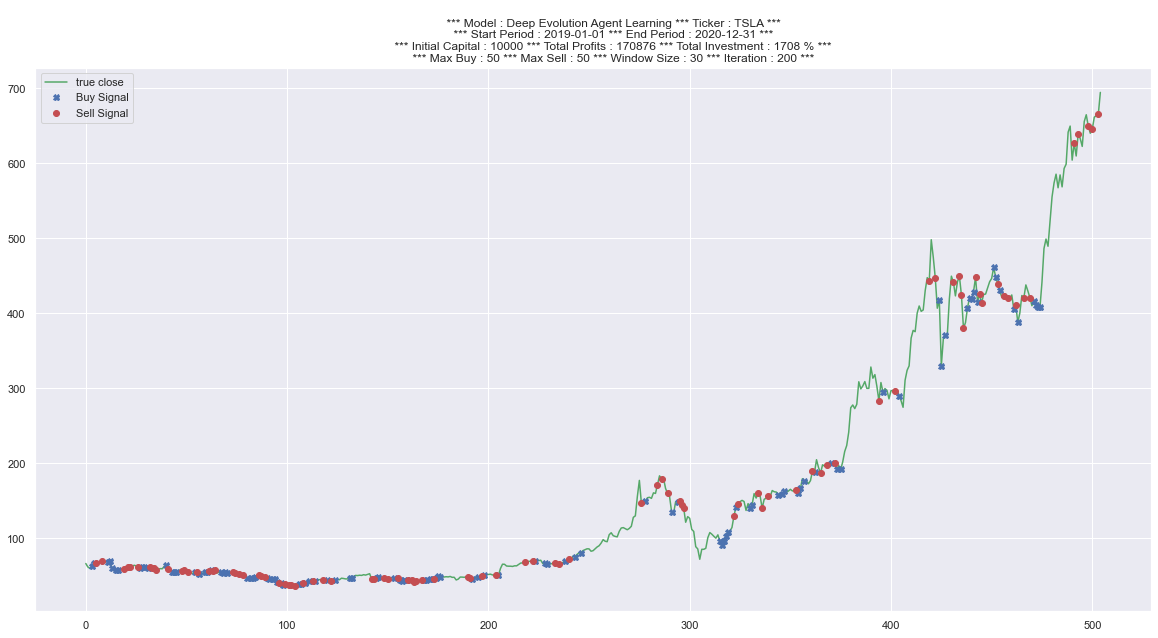

In [868]:
agent.buy()

In [869]:
# Comparison
length = len(df_full)
print(f"Start Date: {start_date} \nEnd Date: {end_date}")
print (f"Total Days: {length}\n")

## Buy and Hold
capital = 10000
buy_price = df_full.at[0,'Open']
sell_price = df_full.at[len(df_full)-1,'Close']
shares_bought = math.floor(capital/buy_price)
total_gains = shares_bought*sell_price - capital
total_investment = total_gains/100

print("Buy and Hold Strategy:")
print(f"Buy Price:{buy_price}, Sell Price:{sell_price}")
print(f"Max Profit: {total_investment}%\n")

## Oracle
min_price = df_full['Open'].min()
max_price = df_full['Close'].max()
shares_bought = math.floor(capital/min_price)
total_gains = shares_bought*max_price - capital
total_investment = total_gains/100

print("Oracle Strategy:")
print(f"Min Price:{min_price}, Sell Price:{max_price}")
print(f"Oracle Max Profit: {total_investment}%")

Start Date: 2019-01-01 
End Date: 2020-12-31
Total Days: 505

Buy and Hold Strategy:
Buy Price:67.482, Sell Price:694.78
Max Profit: 928.2744%

Oracle Strategy:
Min Price:36.22, Sell Price:694.78
Oracle Max Profit: 1817.5928%
